### Work File

In [1]:
filename = "set_minresol_N_5_500.csv"
fold = 'input files/'

### Libraries

In [2]:
from sklearn.metrics.scorer import make_scorer
from class_magnesium_not_drop_na import *
from plot_gridsearch_results import *
import pickle

### Custom metric

$ myMetric = \frac{TP}{P} - \frac{FP}{N} $

In [3]:
class metric(object):
    def __init__(self, type_of):
        self.tp = []
        self.fp = []
        self.type_of = type_of 
    def my_metric_(self):    
        def my_custom_metric(y_true, y_pred):
            tp = np.sum((y_true == 1) & (y_pred == 1))
            fp = np.sum((y_true == 0) & (y_pred == 1))
            p = np.sum(y_true == 1)
            n = np.sum(y_true == 0)
            self.tp.append(tp/p)
            self.fp.append(fp/n)
            return (tp/p - fp/n)
        if self.type_of == 'custom':
            return make_scorer(my_custom_metric, greater_is_better=True)
        else:
            return None
    
    def get_tp_fp_(self, elements, n_splits):
         return [np.array(elements[0::2]).reshape(int(len(elements)/n_splits/2), n_splits), 
                 np.array(elements[1::2]).reshape(int(len(elements)/n_splits/2), n_splits)]
    def get_tp_fp(self, n_splits):
        return self.get_tp_fp_(self.tp, n_splits) + self.get_tp_fp_(self.fp, n_splits)

### Process function

In [4]:
# gridsearch
def Gridsearch_function(filename, fold, n_splits, type_of_metric, parametres, output_filename):
    m = Magnesium(filename, fold = fold,colours = ['#f6c35b', '#929292'], with_groups = False)
    my_metric = metric(type_of_metric)

    grid = GridSearchCV(RandomForestClassifier(n_estimators=200, n_jobs=-1, criterion='gini'),
                       scoring=my_metric.my_metric_(), verbose = 7,
                       cv=StratifiedShuffleSplit(n_splits = n_splits, test_size = 0.3, random_state = 0),
                       param_grid=parametres)

    rus = RandomUnderSampler(ratio = 'auto', random_state=42)
    x, y = rus.fit_sample(m.x, m.y)
    grid.fit(x, y)
    data = grid.cv_results_
    
    # save_data
    dataframe = pd.DataFrame(data)[[2,3,4,5, -2, -1]]

    if type_of_metric == 'custom':
        tp_tests, tp_trains, fp_tests, fp_trains = my_metric.get_tp_fp(n_splits)     
        tp_tests_mean, tp_trains_mean, fp_tests_mean, fp_trains_mean = [np.mean(i, axis = 1)
                                                                     for i in [tp_tests, tp_trains, fp_tests, fp_trains]]

        types = ['tp_tests_mean', 'tp_trains_mean', 'fp_tests_mean', 'fp_trains_mean']
        for j in types:
                dataframe[j] = eval(j)
                
        types = ["tp_tests", "tp_trains", 'fp_tests', 'fp_trains']
        for j in types:
            for i in range(eval(j).shape[1]):
                dataframe[j + '_split_' + str(i)] = eval(j)[:, i]
        
    dataframe.to_csv('outputs/Gridsearch/'+output_filename, index = False, sep = '\t')

## Auto metric

#### Input data

In [5]:
n_splits = 3
type_of_metric = 'auto'  # or 'custom'
parametres = {"max_depth":[1, 5, 10, 15, 20, 25, 30, 35, 40],
              'min_samples_leaf':[1, 5, 10, 15, 20, 25, 30, 35, 40]}

#parametres = {"max_depth":[1, 5],
#              'min_samples_leaf':[1]}

gridsearch_number = 1
output_filename = '_'.join([filename.split('.csv')[0], type_of_metric, str(gridsearch_number)])+'.csv'

#### Gridsearch

In [6]:
Gridsearch_function(filename, fold, n_splits, type_of_metric, parametres, output_filename)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] min_samples_leaf=1, max_depth=1 .................................
[CV] .. min_samples_leaf=1, max_depth=1, score=0.585247, total=   0.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] min_samples_leaf=1, max_depth=1 .................................
[CV] .. min_samples_leaf=1, max_depth=1, score=0.596731, total=   0.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] min_samples_leaf=1, max_depth=1 .................................
[CV] .. min_samples_leaf=1, max_depth=1, score=0.577297, total=   0.5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s remaining:    0.0s


[CV] min_samples_leaf=5, max_depth=1 .................................
[CV] .. min_samples_leaf=5, max_depth=1, score=0.589664, total=   0.5s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s remaining:    0.0s


[CV] min_samples_leaf=5, max_depth=1 .................................
[CV] .. min_samples_leaf=5, max_depth=1, score=0.596290, total=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s remaining:    0.0s


[CV] min_samples_leaf=5, max_depth=1 .................................
[CV] .. min_samples_leaf=5, max_depth=1, score=0.581272, total=   0.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.1s remaining:    0.0s


[CV] min_samples_leaf=10, max_depth=1 ................................
[CV] . min_samples_leaf=10, max_depth=1, score=0.586131, total=   0.5s
[CV] min_samples_leaf=10, max_depth=1 ................................
[CV] . min_samples_leaf=10, max_depth=1, score=0.592756, total=   0.5s
[CV] min_samples_leaf=10, max_depth=1 ................................
[CV] . min_samples_leaf=10, max_depth=1, score=0.591431, total=   0.5s
[CV] min_samples_leaf=15, max_depth=1 ................................
[CV] . min_samples_leaf=15, max_depth=1, score=0.590106, total=   0.5s
[CV] min_samples_leaf=15, max_depth=1 ................................
[CV] . min_samples_leaf=15, max_depth=1, score=0.599823, total=   0.5s
[CV] min_samples_leaf=15, max_depth=1 ................................
[CV] . min_samples_leaf=15, max_depth=1, score=0.587014, total=   0.5s
[CV] min_samples_leaf=20, max_depth=1 ................................
[CV] . min_samples_leaf=20, max_depth=1, score=0.583481, total=   0.6s
[CV] m

[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:  9.0min finished


#### Open data & Plot

<IPython.core.display.Javascript object>


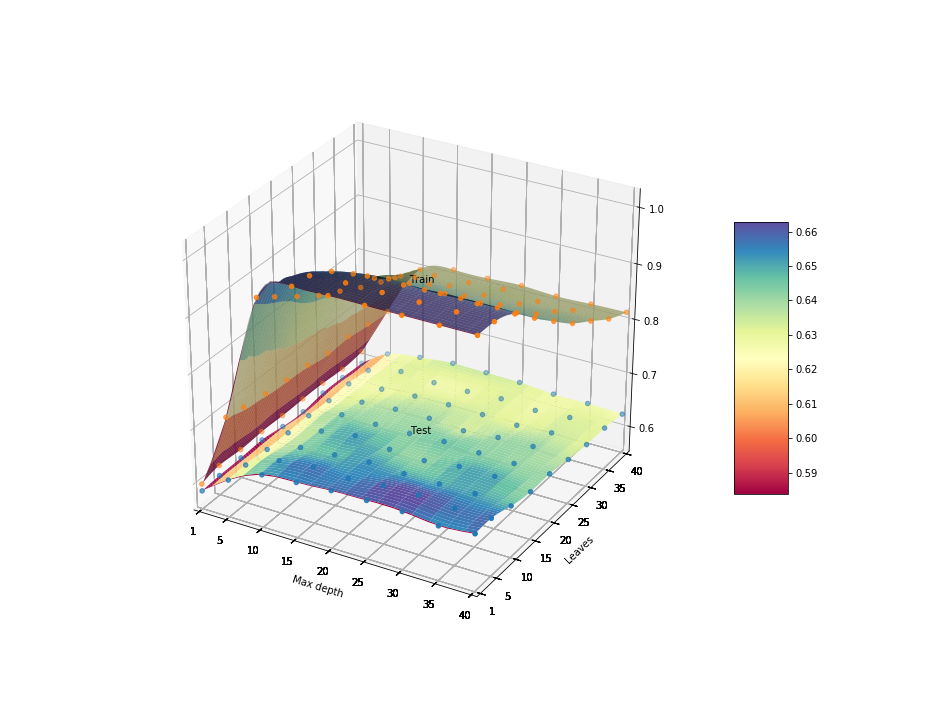

<IPython.core.display.Javascript object>


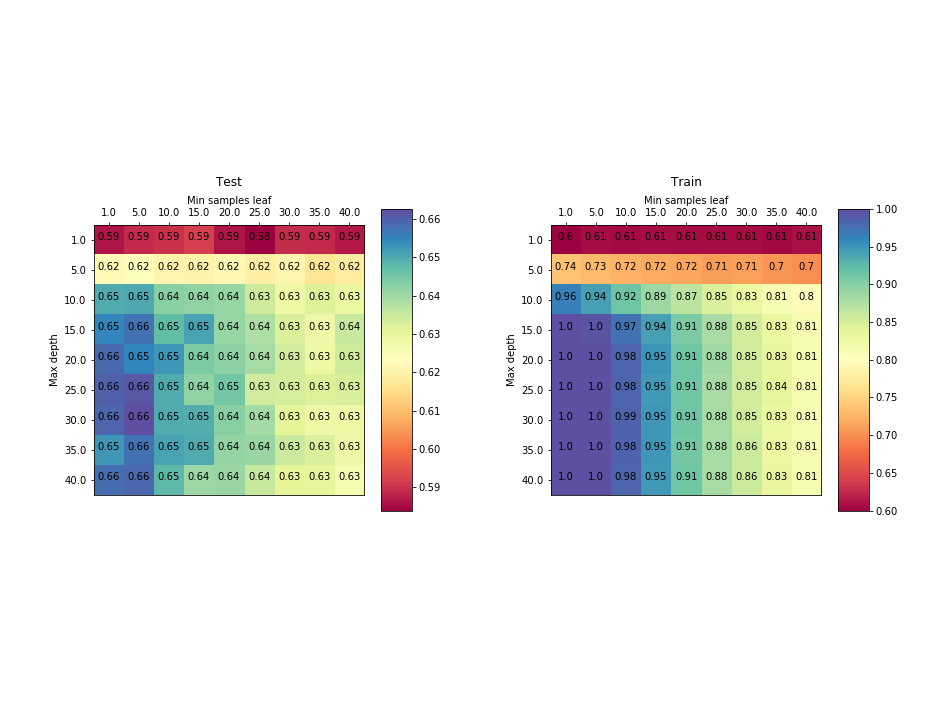

In [7]:
grid_data_auto1 = pd.read_table('outputs/Gridsearch/'+output_filename, sep = '\t')
#grid_data.head()

plot_gridsearch_results(grid_data_auto1)

#### Gridsearch. Step 2

#### Input data

In [12]:
n_splits = 3
type_of_metric = 'auto'  # or 'custom'
parametres = {"max_depth":range(10,46,3),
              'min_samples_leaf':range(1,15,2)}

gridsearch_number = 2
output_filename = '_'.join([filename.split('.csv')[0], type_of_metric, str(gridsearch_number)])+'.csv'

#### Gridsearch

In [13]:
Gridsearch_function(filename, fold, n_splits, type_of_metric, parametres, output_filename)

Fitting 3 folds for each of 84 candidates, totalling 252 fits
[CV] min_samples_leaf=1, max_depth=10 ................................
[CV] . min_samples_leaf=1, max_depth=10, score=0.664311, total=   2.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] min_samples_leaf=1, max_depth=10 ................................
[CV] . min_samples_leaf=1, max_depth=10, score=0.662986, total=   2.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


[CV] min_samples_leaf=1, max_depth=10 ................................
[CV] . min_samples_leaf=1, max_depth=10, score=0.657244, total=   1.9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.8s remaining:    0.0s


[CV] min_samples_leaf=3, max_depth=10 ................................
[CV] . min_samples_leaf=3, max_depth=10, score=0.644435, total=   1.9s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.0s remaining:    0.0s


[CV] min_samples_leaf=3, max_depth=10 ................................
[CV] . min_samples_leaf=3, max_depth=10, score=0.659452, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.1s remaining:    0.0s


[CV] min_samples_leaf=3, max_depth=10 ................................
[CV] . min_samples_leaf=3, max_depth=10, score=0.649293, total=   1.9s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   13.2s remaining:    0.0s


[CV] min_samples_leaf=5, max_depth=10 ................................
[CV] . min_samples_leaf=5, max_depth=10, score=0.645760, total=   1.9s
[CV] min_samples_leaf=5, max_depth=10 ................................
[CV] . min_samples_leaf=5, max_depth=10, score=0.649293, total=   2.1s
[CV] min_samples_leaf=5, max_depth=10 ................................
[CV] . min_samples_leaf=5, max_depth=10, score=0.655035, total=   2.0s
[CV] min_samples_leaf=7, max_depth=10 ................................
[CV] . min_samples_leaf=7, max_depth=10, score=0.646643, total=   1.8s
[CV] min_samples_leaf=7, max_depth=10 ................................
[CV] . min_samples_leaf=7, max_depth=10, score=0.636926, total=   2.0s
[CV] min_samples_leaf=7, max_depth=10 ................................
[CV] . min_samples_leaf=7, max_depth=10, score=0.649735, total=   1.9s
[CV] min_samples_leaf=9, max_depth=10 ................................
[CV] . min_samples_leaf=9, max_depth=10, score=0.642226, total=   1.7s
[CV] m

[Parallel(n_jobs=1)]: Done 252 out of 252 | elapsed: 11.9min finished


#### Open data & Plot

<IPython.core.display.Javascript object>


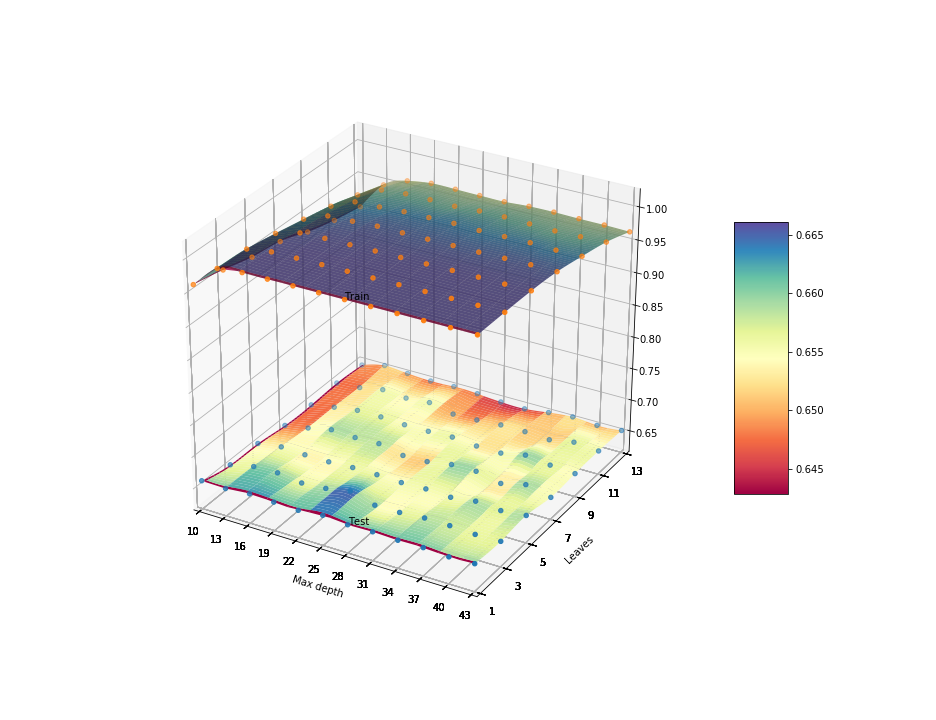

<IPython.core.display.Javascript object>


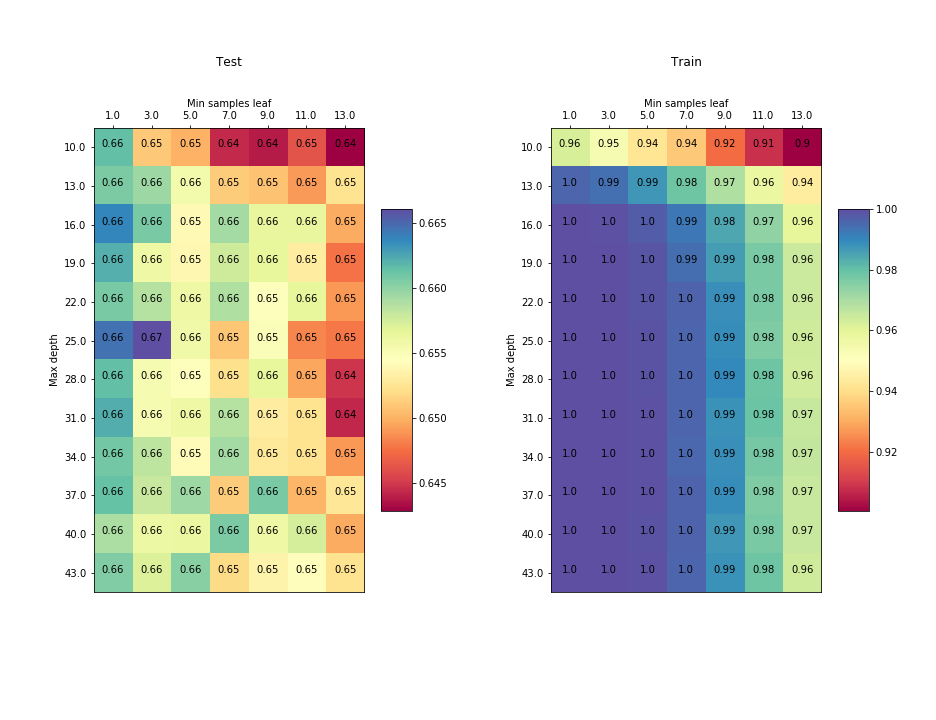

In [14]:
grid_data_auto2 = pd.read_table('outputs/Gridsearch/'+output_filename, sep = '\t')
#grid_data.head()

plot_gridsearch_results(grid_data_auto2)

## Custom metric

#### Input data

In [8]:
n_splits = 3
type_of_metric = 'custom'  # or 'auto'
parametres = {"max_depth":[1, 5, 10, 15, 20, 25, 30, 35, 40],
              'min_samples_leaf':[1, 5, 10, 15, 20, 25, 30, 35, 40]}

#parametres = {"max_depth":[1, 5],
#              'min_samples_leaf':[1]}

gridsearch_number = 1
output_filename = '_'.join([filename.split('.csv')[0], type_of_metric, str(gridsearch_number)])+'.csv' 

#### Gridsearch

In [9]:
Gridsearch_function(filename, fold, n_splits, type_of_metric, parametres, output_filename)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] min_samples_leaf=1, max_depth=1 .................................
[CV] .. min_samples_leaf=1, max_depth=1, score=0.169611, total=   0.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] min_samples_leaf=1, max_depth=1 .................................
[CV] .. min_samples_leaf=1, max_depth=1, score=0.183746, total=   0.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] min_samples_leaf=1, max_depth=1 .................................
[CV] .. min_samples_leaf=1, max_depth=1, score=0.183746, total=   0.5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s


[CV] min_samples_leaf=5, max_depth=1 .................................
[CV] .. min_samples_leaf=5, max_depth=1, score=0.169611, total=   0.5s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s remaining:    0.0s


[CV] min_samples_leaf=5, max_depth=1 .................................
[CV] .. min_samples_leaf=5, max_depth=1, score=0.191696, total=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.3s remaining:    0.0s


[CV] min_samples_leaf=5, max_depth=1 .................................
[CV] .. min_samples_leaf=5, max_depth=1, score=0.165194, total=   0.6s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.1s remaining:    0.0s


[CV] min_samples_leaf=10, max_depth=1 ................................
[CV] . min_samples_leaf=10, max_depth=1, score=0.179329, total=   0.6s
[CV] min_samples_leaf=10, max_depth=1 ................................
[CV] . min_samples_leaf=10, max_depth=1, score=0.215548, total=   0.5s
[CV] min_samples_leaf=10, max_depth=1 ................................
[CV] . min_samples_leaf=10, max_depth=1, score=0.181979, total=   0.5s
[CV] min_samples_leaf=15, max_depth=1 ................................
[CV] . min_samples_leaf=15, max_depth=1, score=0.174028, total=   0.6s
[CV] min_samples_leaf=15, max_depth=1 ................................
[CV] . min_samples_leaf=15, max_depth=1, score=0.196113, total=   0.5s
[CV] min_samples_leaf=15, max_depth=1 ................................
[CV] . min_samples_leaf=15, max_depth=1, score=0.166961, total=   0.5s
[CV] min_samples_leaf=20, max_depth=1 ................................
[CV] . min_samples_leaf=20, max_depth=1, score=0.169611, total=   0.5s
[CV] m

[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:  8.7min finished


#### Open data & Plot

<IPython.core.display.Javascript object>


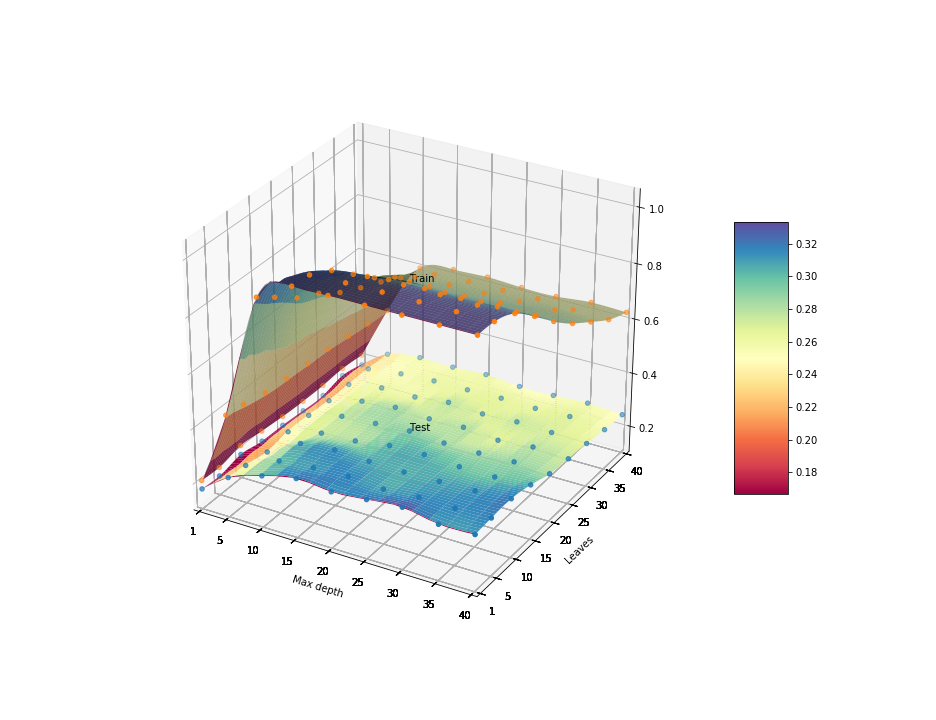

<IPython.core.display.Javascript object>


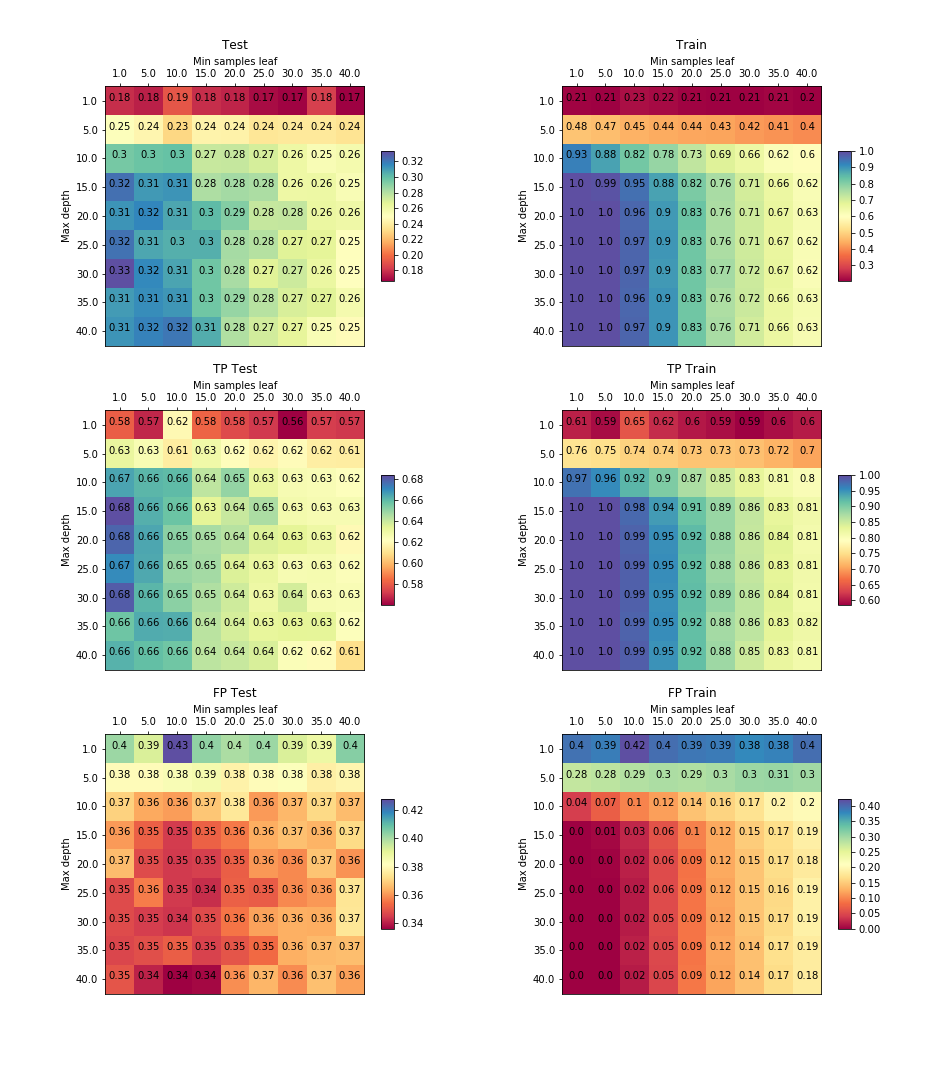

In [10]:
grid_data_custom1 = pd.read_table('outputs/Gridsearch/'+output_filename , sep = '\t')
#grid_data.head()
plot_gridsearch_results(grid_data_custom1, type_of_metric)

### Gridsearch step 2

#### Input data

In [15]:
n_splits = 3
type_of_metric = 'custom'  # or 'auto'
parametres = {"max_depth":range(12, 48,3),
              'min_samples_leaf':range(1,8)}

#parametres = {"max_depth":[1, 5],
#              'min_samples_leaf':[1]}

gridsearch_number = 2
output_filename = '_'.join([filename.split('.csv')[0], type_of_metric, str(gridsearch_number)])+'.csv' 

#### Gridsearch

In [16]:
Gridsearch_function(filename, fold, n_splits, type_of_metric, parametres, output_filename)

Fitting 3 folds for each of 84 candidates, totalling 252 fits
[CV] min_samples_leaf=1, max_depth=12 ................................
[CV] . min_samples_leaf=1, max_depth=12, score=0.314488, total=   2.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] min_samples_leaf=1, max_depth=12 ................................
[CV] . min_samples_leaf=1, max_depth=12, score=0.307420, total=   2.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.8s remaining:    0.0s


[CV] min_samples_leaf=1, max_depth=12 ................................
[CV] . min_samples_leaf=1, max_depth=12, score=0.301237, total=   2.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.3s remaining:    0.0s


[CV] min_samples_leaf=2, max_depth=12 ................................
[CV] . min_samples_leaf=2, max_depth=12, score=0.310954, total=   2.3s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.9s remaining:    0.0s


[CV] min_samples_leaf=2, max_depth=12 ................................
[CV] . min_samples_leaf=2, max_depth=12, score=0.320671, total=   2.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.6s remaining:    0.0s


[CV] min_samples_leaf=2, max_depth=12 ................................
[CV] . min_samples_leaf=2, max_depth=12, score=0.317138, total=   2.2s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   15.1s remaining:    0.0s


[CV] min_samples_leaf=3, max_depth=12 ................................
[CV] . min_samples_leaf=3, max_depth=12, score=0.291519, total=   2.4s
[CV] min_samples_leaf=3, max_depth=12 ................................
[CV] . min_samples_leaf=3, max_depth=12, score=0.307420, total=   2.3s
[CV] min_samples_leaf=3, max_depth=12 ................................
[CV] . min_samples_leaf=3, max_depth=12, score=0.305654, total=   2.3s
[CV] min_samples_leaf=4, max_depth=12 ................................
[CV] . min_samples_leaf=4, max_depth=12, score=0.297703, total=   2.2s
[CV] min_samples_leaf=4, max_depth=12 ................................
[CV] . min_samples_leaf=4, max_depth=12, score=0.303004, total=   2.2s
[CV] min_samples_leaf=4, max_depth=12 ................................
[CV] . min_samples_leaf=4, max_depth=12, score=0.325088, total=   2.2s
[CV] min_samples_leaf=5, max_depth=12 ................................
[CV] . min_samples_leaf=5, max_depth=12, score=0.284452, total=   2.4s
[CV] m

[Parallel(n_jobs=1)]: Done 252 out of 252 | elapsed: 11.9min finished


#### Open data & Plot

<IPython.core.display.Javascript object>


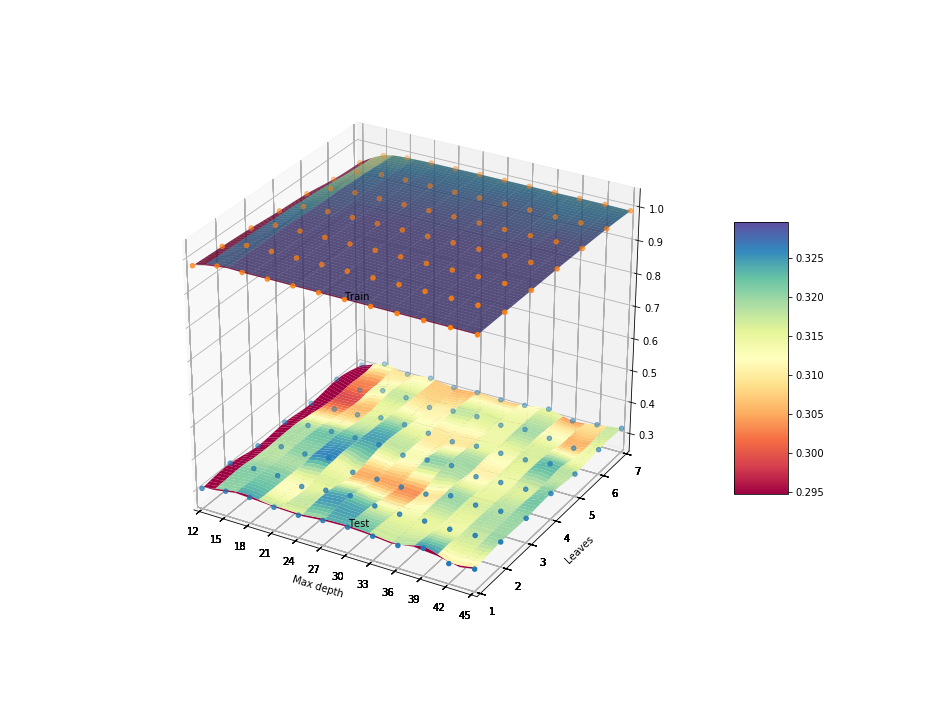

<IPython.core.display.Javascript object>


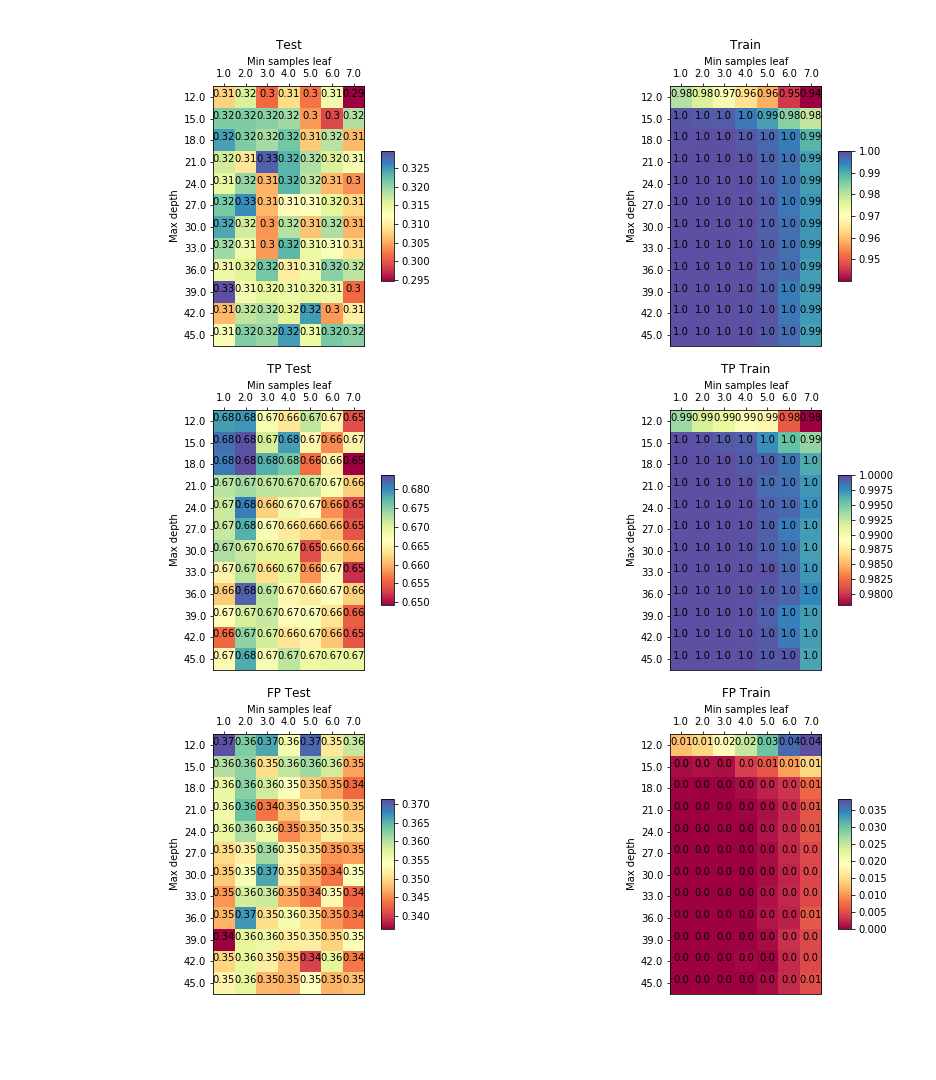

In [17]:
grid_data_custom2 = pd.read_table('outputs/Gridsearch/'+output_filename , sep = '\t')
#grid_data.head()
plot_gridsearch_results(grid_data_custom2, type_of_metric)